IMPORTS

In [1]:
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
from dateutil.parser import parse
from dateutil import parser
import numpy as np
import seaborn as sns
import networkx as nx
# import community  # Louvain community detection algorithm
from shapely.geometry import Point, LineString
import geopandas as gpd

import networkx as nx
import geopandas as gpd
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

In [2]:
df = pd.read_csv('data/summob.csv', index_col=0)
df.columns = df.columns.astype(int)
df

,1,2,3,4,5,6,7,8,9,10,...,40,42,43,44,45,46,47,48,49,51
ZT,,,,,,,,,,,,,,,,,,,,,
1,12551.0,8033.0,4295.0,2859.0,3332.0,9223.0,7266.0,5575.0,9510.0,3466.0,...,482.0,4560.0,4545.0,9884.0,500.0,0.0,1956.0,896.0,516.0,175.0
2,8033.0,7455.0,1194.0,301.0,925.0,2339.0,3636.0,3441.0,2095.0,388.0,...,120.0,500.0,136.0,881.0,642.0,222.0,439.0,208.0,69.0,73.0
3,4295.0,1194.0,4170.0,2562.0,2109.0,600.0,894.0,553.0,2003.0,1940.0,...,124.0,929.0,606.0,896.0,95.0,0.0,40.0,0.0,246.0,44.0
4,2859.0,301.0,2562.0,2817.0,322.0,766.0,820.0,164.0,660.0,117.0,...,16.0,410.0,0.0,54.0,0.0,0.0,0.0,0.0,18.0,0.0
5,3332.0,925.0,2109.0,322.0,1382.0,1533.0,1185.0,501.0,1320.0,913.0,...,55.0,1233.0,542.0,440.0,48.0,98.0,279.0,0.0,66.0,0.0
6,9223.0,2339.0,600.0,766.0,1533.0,5654.0,9912.0,837.0,1506.0,836.0,...,101.0,743.0,502.0,941.0,142.0,0.0,80.0,180.0,39.0,0.0
7,7266.0,3636.0,894.0,820.0,1185.0,9912.0,8334.0,1846.0,1876.0,600.0,...,24.0,203.0,203.0,1430.0,48.0,0.0,160.0,232.0,116.0,0.0
8,5575.0,3441.0,553.0,164.0,501.0,837.0,1846.0,11188.0,1517.0,117.0,...,54.0,287.0,136.0,853.0,48.0,111.0,120.0,90.0,13.0,58.0
9,9510.0,2095.0,2003.0,660.0,1320.0,1506.0,1876.0,1517.0,10952.0,434.0,...,960.0,4011.0,1743.0,3417.0,832.0,0.0,280.0,313.0,472.0,132.0


Reading file with coordinates of Traffic Zones

In [3]:
zones = pd.read_excel('data/coordsZonas.xlsx', index_col=0)

columns_to_drop = [36, 41, 50, 52, 55, 53, 35, 54]

# Drop only existing columns
zones = zones.drop(columns=columns_to_drop, errors='ignore')

# Drop rows with specified indexes
zones = zones.drop(index=columns_to_drop, errors='ignore')

zones

,Nome_ZT,XCOORD,YCOORD
ZTrafego,,,
1,Centro,-45.886701,-23.190638
2,Vila Maria e Vila Santa Luzia,-45.882070,-23.178009
3,Jardim Paulista e Monte Castelo,-45.873745,-23.182939
4,Vila So Pedro e Jardim Jussara,-45.869327,-23.188904
5,Vila Piratininga e Jardim Augusta,-45.880360,-23.195879
6,Vila Adyanna e Vila Betania,-45.892252,-23.203218
7,Vila Ema e Jardim Esplanada,-45.902175,-23.199704
8,Santana e Vila Rossi,-45.898069,-23.165302
9,Vila Industrial e VilaTatetuba,-45.857077,-23.180798


Creating a flow histogram between pairs of zones

In [4]:
flow_dict = {}

for coluna in df.columns:
    for indice, valor in df[coluna].items():
        if indice != coluna and f"{indice}-{coluna}" not in flow_dict:  # Excluir valores na diagonal e valores duplicados
            chave = f"{coluna}-{indice}"
            flow_dict[chave] = valor

print(flow_dict)

{'1-2': 8033.0, '1-3': 4295.0, '1-4': 2859.0, '1-5': 3332.0, '1-6': 9223.0, '1-7': 7266.0, '1-8': 5575.0, '1-9': 9510.0, '1-10': 3466.0, '1-11': 1724.0, '1-12': 2666.0, '1-13': 9265.0, '1-14': 6731.0, '1-15': 468.0, '1-16': 5539.0, '1-17': 1713.0, '1-18': 2856.0, '1-19': 2738.0, '1-20': 4564.0, '1-21': 2677.0, '1-22': 3496.0, '1-23': 7632.0, '1-24': 1619.0, '1-25': 9132.0, '1-26': 1625.0, '1-27': 1255.0, '1-28': 3334.0, '1-29': 4714.0, '1-30': 5734.0, '1-31': 5527.0, '1-32': 3807.0, '1-33': 292.0, '1-34': 3082.0, '1-37': 1498.0, '1-38': 1780.0, '1-39': 1191.0, '1-40': 482.0, '1-42': 4560.0, '1-43': 4545.0, '1-44': 9884.0, '1-45': 500.0, '1-46': 0.0, '1-47': 1956.0, '1-48': 896.0, '1-49': 516.0, '1-51': 175.0, '2-3': 1194.0, '2-4': 301.0, '2-5': 925.0, '2-6': 2339.0, '2-7': 3636.0, '2-8': 3441.0, '2-9': 2095.0, '2-10': 388.0, '2-11': 289.0, '2-12': 392.0, '2-13': 3254.0, '2-14': 2389.0, '2-15': 106.0, '2-16': 180.0, '2-17': 728.0, '2-18': 1116.0, '2-19': 202.0, '2-20': 200.0, '2-21': 10

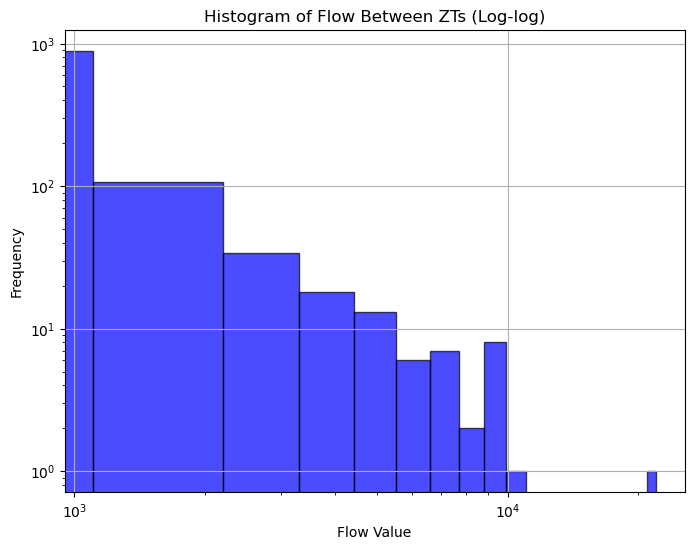

In [5]:
# Extract values from the dictionary
flow_values = list(flow_dict.values())

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(flow_values, bins=20, alpha=0.7, color='blue', edgecolor='black')

plt.xlabel('Flow Value')
plt.ylabel('Frequency')
plt.title('Histogram of Flow Between ZTs (Log-log)')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()

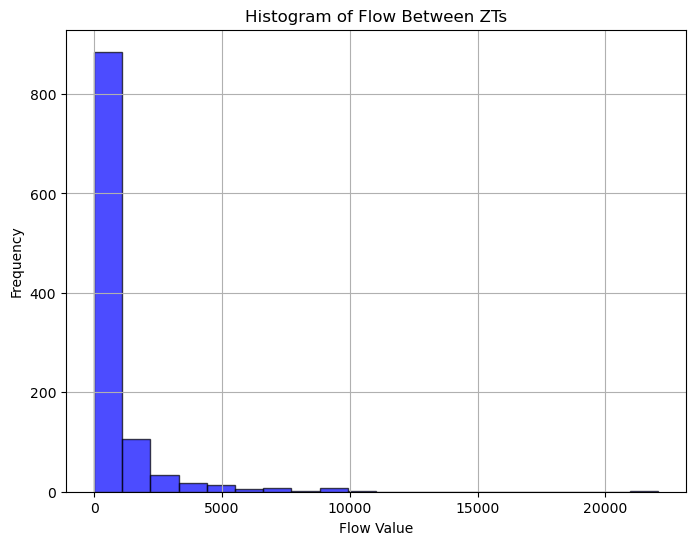

In [6]:
# Extract values from the dictionary
flow_values = list(flow_dict.values())

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(flow_values, bins=20, alpha=0.7, color='blue', edgecolor='black')

plt.xlabel('Flow Value')
plt.ylabel('Frequency')
plt.title('Histogram of Flow Between ZTs')
plt.grid(True)
plt.show()

In [7]:
def save_adj_mtx_and_nodes(graph, mtx_filename, nodes_filename):
    nodes = list(graph.nodes())
    adj_mtx = nx.adjacency_matrix(graph, nodelist=nodes).todense()

    adj_mtx = (adj_mtx !=0).astype(int)

    np.savetxt(mtx_filename, adj_mtx, fmt = '%d')

    with open(nodes_filename, 'w') as f:
        for node in nodes:
            f.write(f'{node}\n')

#### GRAPH 1

In [8]:
import pickle
def save_graph(graph, filename):
    with open(filename, 'wb') as f:
        pickle.dump(graph, f)

In [9]:
grafo1 = nx.Graph()

threshold = 0

# Add nodes using columns
grafo1.add_nodes_from(df.columns)

# Add edges for values greater than 0 in the upper triangle
for i in range(len(df.columns)):
    for j in range(i + 1, len(df.columns)):
        weight = df.iloc[i, j]
        # print(weight)
        if weight > threshold:
            grafo1.add_edge(df.columns[i], df.columns[j], weight=weight)

# nx.write_adjlist(grafo1,'grafo1_mob.adjlist')
save_adj_mtx_and_nodes(grafo1, 'output/grafo1_mob_mtx.txt', 'output/grafo1_mob_nodes.txt')

In [10]:
# Function to filter the adjacency matrix based on the threshold, converting values above the threshold to 1
def filter_adjacency_matrix(adj_matrix, threshold):
    binary_matrix = np.where(adj_matrix > threshold, 1, 0)
    return binary_matrix

# Function to Save the Adjacency Matrix with the Actual Values
def save_adj_mtx_with_actual_values(adj_matrix, threshold):
    mtx_filename = f'filtered_adj_matrix_threshold_{threshold:.2f}.txt'
    
    folder = 'output/mtx_mob/'
    np.savetxt(folder+mtx_filename, adj_matrix, fmt='%d')
    print(f'Saved filtered adjacency matrix with threshold {threshold:.2f} to {mtx_filename}')

# Obter a matriz de adjacência do grafo com pesos
adj_matrix = nx.to_numpy_array(grafo1, weight='weight')

for threshold in np.arange(0, 25000, 10):
    filtered_matrix = filter_adjacency_matrix(adj_matrix, threshold)
    # Verificar se a matriz filtrada possui pelo menos um valor diferente de 0
    if np.any(filtered_matrix):
        save_adj_mtx_with_actual_values(filtered_matrix, threshold)
    else:
        print(f'Matriz filtrada com limiar {threshold:.0f} só contém zeros. Interrompendo o loop...')
        break

Saved filtered adjacency matrix with threshold 0.00 to filtered_adj_matrix_threshold_0.00.txt
Saved filtered adjacency matrix with threshold 10.00 to filtered_adj_matrix_threshold_10.00.txt
Saved filtered adjacency matrix with threshold 20.00 to filtered_adj_matrix_threshold_20.00.txt
Saved filtered adjacency matrix with threshold 30.00 to filtered_adj_matrix_threshold_30.00.txt
Saved filtered adjacency matrix with threshold 40.00 to filtered_adj_matrix_threshold_40.00.txt
Saved filtered adjacency matrix with threshold 50.00 to filtered_adj_matrix_threshold_50.00.txt
Saved filtered adjacency matrix with threshold 60.00 to filtered_adj_matrix_threshold_60.00.txt
Saved filtered adjacency matrix with threshold 70.00 to filtered_adj_matrix_threshold_70.00.txt
Saved filtered adjacency matrix with threshold 80.00 to filtered_adj_matrix_threshold_80.00.txt
Saved filtered adjacency matrix with threshold 90.00 to filtered_adj_matrix_threshold_90.00.txt
Saved filtered adjacency matrix with thres

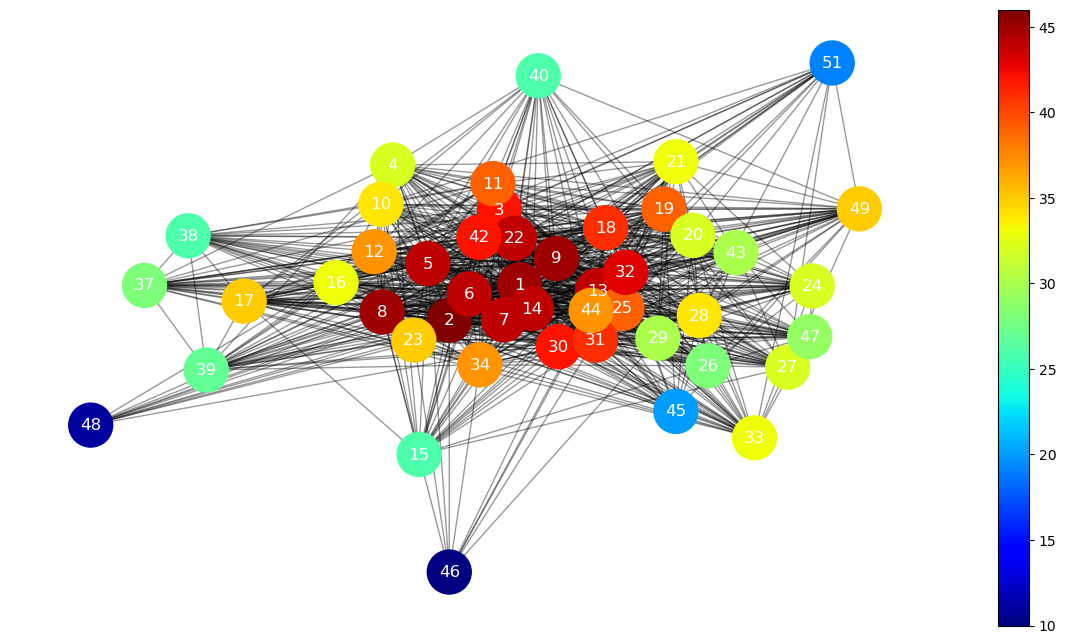

In [11]:
# the degree of network(g)
fig, ax = plt.subplots(1,1,figsize=(15,8))

# layout position
pos = nx.spring_layout(grafo1,seed=123456789,k=1)
# color of nodes
color = list(dict(nx.degree(grafo1)).values())

# draw edges
nx.draw_networkx_edges(grafo1,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(grafo1,
                 pos=pos,
                 node_size=1000,
                 node_color=color,
                 cmap=plt.cm.jet,ax=ax)

# draw labels
nx.draw_networkx_labels(grafo1, pos=pos,
                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('degree.png', transparent=True,dpi=300)
plt.show()

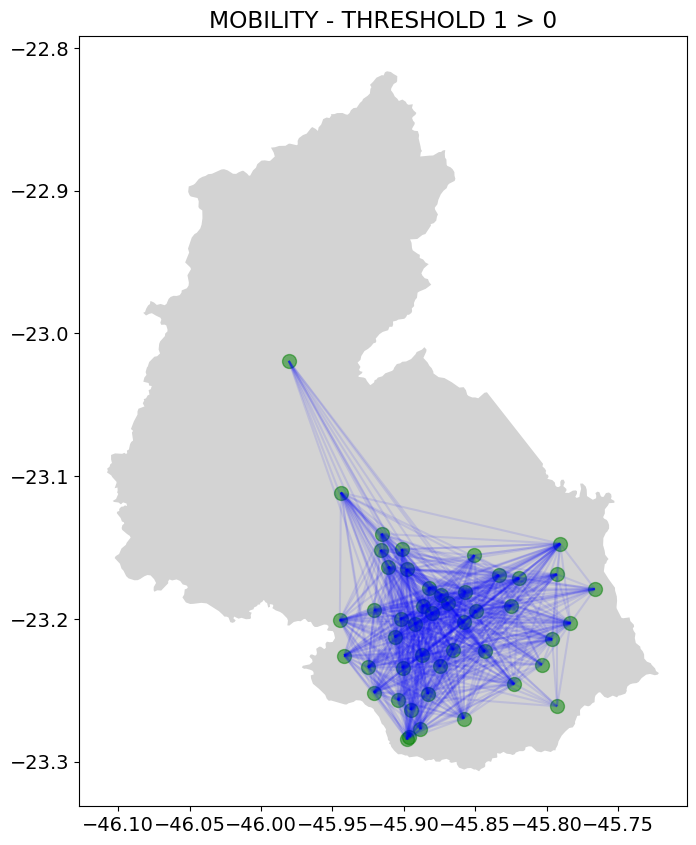

In [12]:
threshold = 0

# Criar geometria dos pontos
geometry = [Point(xy) for xy in zip(zones['XCOORD'], zones['YCOORD'])]

# Criar GeoDataFrame dos nós
gdf_zones = gpd.GeoDataFrame(zones, geometry=geometry, crs='EPSG:4326')

# Criar lista de linhas para as arestas do grafo
lines = []
for edge in grafo1.edges():
    # print('Arestas')
    start_node = edge[0]
    end_node = edge[1]

    # Verificar se os nós existem no DataFrame
    if start_node in gdf_zones.index and end_node in gdf_zones.index:
        start_point = (gdf_zones.loc[start_node].geometry.x, gdf_zones.loc[start_node].geometry.y)
        end_point = (gdf_zones.loc[end_node].geometry.x, gdf_zones.loc[end_node].geometry.y)
        line = LineString([start_point, end_point])
        lines.append(line)

# Criar GeoDataFrame das linhas
gdf_lines = gpd.GeoDataFrame(geometry=lines, crs='EPSG:4326')
# print(gdf_lines)
# Load the shapefile or GeoJSON file for São José dos Campos
sjc = gpd.read_file('data/map.geojson')

plt.rcParams.update({'font.size': 14})

# Plot the map of SJC
ax = sjc.plot(figsize=(10, 10), color='lightgrey')

# Plot os pontos adicionais
gdf_zones.plot(ax=ax, color='green', alpha=0.5, markersize=100)

# Plot as linhas das arestas
gdf_lines.plot(ax=ax, color='blue', alpha=0.1, aspect='equal')

# Add title
# plt.title(f'Mob - LIMIAR 1 >{threshold}')
plt.title(f'MOBILITY - THRESHOLD 1 > {round(threshold, 3)}')

# Show the map
plt.show()


In [13]:
def calcula_metricas(grafo):
    total_graph = grafo.copy()
    
    # Check if the graph is connected and get the largest component
    if not nx.is_connected(grafo):
        print("Não é conectado")
        componentes = list(nx.connected_components(grafo))
        print(type(componentes))
        maior_componente = max(componentes, key=len)
        grafo = grafo.subgraph(maior_componente).copy()

    # Helper function to find all nodes with the maximum value
    def get_nodes_with_max_value(dictionary):
        print(dictionary)
        max_value = max(dictionary.values())
        return [(node,value) for node, value in dictionary.items() if value == max_value]
    
    # Calculate the measures in the largest component
    degree_dict = dict(nx.degree(grafo))
    grau_medio = sum(degree_dict.values()) / len(grafo)
    aglomeracao_dict = nx.clustering(grafo)
    aglomeracao_medio = nx.average_clustering(grafo)
    minimo_caminho_medio = nx.average_shortest_path_length(grafo)
    diametro = nx.diameter(grafo)
    betweenness_centrality = nx.betweenness_centrality(grafo)
    betweenness_medio = sum(betweenness_centrality.values()) / len(grafo)
    degree_centrality = nx.degree_centrality(grafo)
    
    # Find all nodes with maximum values in the measures
    maiores_graus = get_nodes_with_max_value(degree_dict)
    maiores_aglomeracao = get_nodes_with_max_value(aglomeracao_dict)
    maiores_degree_centrality = get_nodes_with_max_value(degree_centrality)
    maiores_betweenness_centrality = get_nodes_with_max_value(betweenness_centrality)
    
    # Metrics for the entire graph
    degree_dict_total = dict(nx.degree(total_graph))
    grau_medio_total = sum(degree_dict_total.values()) / len(total_graph)
    aglomeracao_dict_total = nx.clustering(total_graph)
    aglomeracao_media_total = nx.average_clustering(total_graph)
    betweenness_centrality_total = nx.betweenness_centrality(total_graph)
    betweenness_medio_total = sum(betweenness_centrality_total.values()) / len(total_graph)
    degree_centrality_total = nx.degree_centrality(total_graph)
    
    # Find all nodes with maximum values in the measures for the entire graph
    maiores_graus_total = get_nodes_with_max_value(degree_dict_total)
    maiores_aglomeracao_total = get_nodes_with_max_value(aglomeracao_dict_total)
    maiores_degree_centrality_total = get_nodes_with_max_value(degree_centrality_total)
    maiores_betweenness_centrality_total = get_nodes_with_max_value(betweenness_centrality_total)

    print('\nMETRICS FOR THE ENTIRE GRAPH')
    
    print(f'Number of nodes in the original graph: {total_graph.number_of_nodes()}')
    print(f'Number of edges in the original graph: {total_graph.number_of_edges()}')
    # Display measures for the entire graph
    print("Average Degree:", grau_medio_total)
    print("Average Clustering:", aglomeracao_media_total)
    print("Average Betweenness:", betweenness_medio_total)
    # Display nodes with the highest centrality indices
    print("\nNodes with highest degree:", maiores_graus_total)
    print("Nodes with highest clustering centrality:", maiores_aglomeracao_total)
    print("Nodes with highest degree centrality:", maiores_degree_centrality_total)
    print("Nodes with highest betweenness centrality:", maiores_betweenness_centrality_total)

    print('\nMETRICS FOR THE LARGEST COMPONENT OF THE GRAPH')
    # Display information about the largest component
    print("Number of nodes in the largest component:", grafo.number_of_nodes())
    print("Number of edges in the largest component:", grafo.number_of_edges())
    # Display the measures calculated for the largest component
    print("Average Degree:", grau_medio)
    print("Average Clustering:", aglomeracao_medio)
    print("Average Shortest Path:", minimo_caminho_medio)
    print("Diameter:", diametro)
    print("Average Betweenness:", betweenness_medio)

    # Display nodes with the highest centrality indices in the largest component
    print("\nNodes with highest degree in the largest component:", maiores_graus)
    print("Nodes with highest clustering centrality in the largest component:", maiores_aglomeracao)
    print("Nodes with highest degree centrality in the largest component:", maiores_degree_centrality)
    print("Nodes with highest betweenness centrality in the largest component:", maiores_betweenness_centrality)

In [14]:
def top_x_nodes_by_strength_and_centrality(G, top_x=10):
    # Calculate the strength (sum of edge weights) for each node
    strength = {node: sum(data['weight'] for _, _, data in G.edges(node, data=True)) for node in G.nodes()}

    # Calculate closeness centrality using the inverse of the edge weight
    for u, v, data in G.edges(data=True):
        data['inverse_weight'] = 1 / data['weight'] if data['weight'] != 0 else 0
    
    closeness_centrality = nx.closeness_centrality(G, distance='inverse_weight')

    # Calculate betweenness centrality using the inverse of the weight
    betweenness_centrality = nx.betweenness_centrality(G, weight='inverse_weight')

    # Calculate other centrality measures
    degree_centrality = nx.degree_centrality(G)
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000, weight='weight')

    # Calculate clustering coefficient for each node
    # clustering_coefficients = nx.clustering(G)
    clustering_coefficients = nx.clustering(G, weight='weight')

    def get_top_with_ties(metric_dict, top_x):
        sorted_nodes = sorted(metric_dict.items(), key=lambda x: x[1], reverse=True)
        top_nodes = sorted_nodes[:top_x]
        
        if len(sorted_nodes) > top_x:
            cutoff_value = top_nodes[-1][1]
            for node, value in sorted_nodes[top_x:]:
                if value == cutoff_value:
                    top_nodes.append((node, value))
                else:
                    break
        return top_nodes

    # Sort nodes by different centralities
    top_strength_nodes = get_top_with_ties(strength, top_x)
    top_closeness_nodes = get_top_with_ties(closeness_centrality, top_x)
    top_betweenness_nodes = get_top_with_ties(betweenness_centrality, top_x)
    top_degree_nodes = get_top_with_ties(degree_centrality, top_x)
    top_eigenvector_nodes = get_top_with_ties(eigenvector_centrality, top_x)
    top_clustering_nodes = get_top_with_ties(clustering_coefficients, top_x)

    print(f"Top {top_x} nodes by strength based on edge weights:")
    for node, value in top_strength_nodes:
        print(f"{node} - {value:.2f}")

    print(f"\nTop {top_x} nodes by closeness centrality (inverse of weight):")
    for node, value in top_closeness_nodes:
        print(f"{node} - {value:.4f}")

    print(f"\nTop {top_x} nodes by betweenness centrality (inverse of weight):")
    for node, value in top_betweenness_nodes:
        print(f"{node} - {value:.4f}")

    print(f"\nTop {top_x} nodes by degree centrality:")
    for node, value in top_degree_nodes:
        print(f"{node} - {value:.4f}")

    print(f"\nTop {top_x} nodes by eigenvector centrality:")
    for node, value in top_eigenvector_nodes:
        print(f"{node} - {value:.4f}")

    print(f"\nTop {top_x} nodes by clustering coefficient:")
    for node, value in top_clustering_nodes:
        print(f"{node} - {value:.4f}")

In [15]:
calcula_metricas(grafo1)

{1: 45, 2: 46, 3: 42, 4: 32, 5: 44, 6: 44, 7: 44, 8: 45, 9: 45, 10: 34, 11: 39, 12: 37, 13: 44, 14: 44, 15: 26, 16: 33, 17: 35, 18: 41, 19: 39, 20: 32, 21: 33, 22: 44, 23: 35, 24: 32, 25: 39, 26: 28, 27: 32, 28: 34, 29: 30, 30: 42, 31: 41, 32: 43, 33: 33, 34: 37, 37: 28, 38: 26, 39: 27, 40: 26, 42: 42, 43: 30, 44: 37, 45: 20, 46: 10, 47: 29, 48: 11, 49: 35, 51: 19}
{1: 0.7696969696969697, 2: 0.744927536231884, 3: 0.8072009291521487, 4: 0.9032258064516129, 5: 0.7854122621564482, 6: 0.7864693446088795, 7: 0.7864693446088795, 8: 0.7494949494949495, 9: 0.7696969696969697, 10: 0.8716577540106952, 11: 0.7935222672064778, 12: 0.8603603603603603, 13: 0.7949260042283298, 14: 0.7864693446088795, 15: 0.9507692307692308, 16: 0.8863636363636364, 17: 0.8554621848739495, 18: 0.8121951219512196, 19: 0.8313090418353576, 20: 0.8830645161290323, 21: 0.8560606060606061, 22: 0.7854122621564482, 23: 0.8436974789915966, 24: 0.905241935483871, 25: 0.8340080971659919, 26: 0.9074074074074074, 27: 0.872983870967

In [16]:
top_x_nodes_by_strength_and_centrality(grafo1)

Top 10 nodes by strength based on edge weights:
1 - 173732.00
13 - 109037.00
25 - 84709.00
7 - 72724.00
14 - 70672.00
9 - 67819.00
6 - 60123.00
30 - 59541.00
31 - 57818.00
28 - 46472.00

Top 10 nodes by closeness centrality (inverse of weight):
1 - 2070.0107
13 - 1815.9436
25 - 1790.0437
9 - 1752.5200
44 - 1731.1083
6 - 1724.1550
7 - 1696.8488
14 - 1659.0222
23 - 1654.1232
2 - 1654.0364

Top 10 nodes by betweenness centrality (inverse of weight):
1 - 0.8541
13 - 0.1643
9 - 0.1198
7 - 0.0444
21 - 0.0435
23 - 0.0435
32 - 0.0435
44 - 0.0435
28 - 0.0415
16 - 0.0406

Top 10 nodes by degree centrality:
2 - 1.0000
1 - 0.9783
8 - 0.9783
9 - 0.9783
5 - 0.9565
6 - 0.9565
7 - 0.9565
13 - 0.9565
14 - 0.9565
22 - 0.9565

Top 10 nodes by eigenvector centrality:
1 - 0.4400
13 - 0.3750
25 - 0.3348
7 - 0.2433
14 - 0.2312
30 - 0.2205
6 - 0.2161
31 - 0.2088
9 - 0.1937
28 - 0.1804

Top 10 nodes by clustering coefficient:
1 - 0.0681
13 - 0.0474
25 - 0.0452
29 - 0.0404
7 - 0.0373
14 - 0.0373
9 - 0.0347
28 -

In [17]:
save_graph(grafo1, "grafo1_mob.pkl")

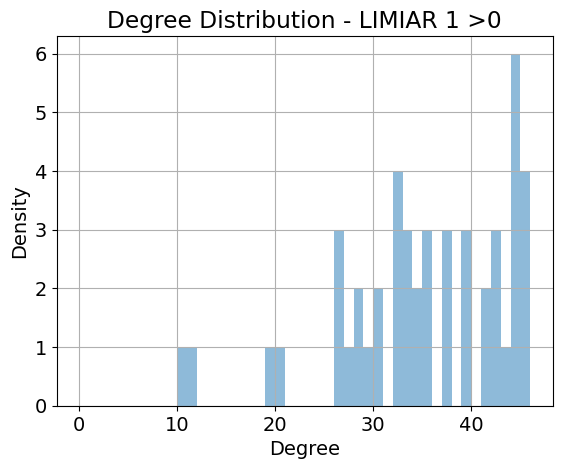

In [18]:
# Calculate the degree of each node
degrees = [degree for node, degree in grafo1.degree()]

# Plot the histogram of degree distribution
plt.hist(degrees, bins=range(0, max(degrees) + 1), alpha=0.5)
plt.title(f"Degree Distribution - LIMIAR 1 >{threshold}")
plt.xlabel("Degree")
plt.ylabel("Density")
# Add grid
plt.grid(True)
plt.show()

### GRAFO 2

In [19]:
grafo2 = nx.Graph()

upper_tri_indices = np.triu_indices_from(df, k=1)
upper_tri_values = df.values[upper_tri_indices]

# Ordenar os valores e calcular o quantil 0.95
threshold2 = np.quantile(upper_tri_values, 0.95)

grafo2 = nx.Graph()

# Add nodes using columns
grafo2.add_nodes_from(df.columns)

# Add edges for values greater than 0 in the upper triangle
for i in range(len(df.columns)):
    for j in range(i + 1, len(df.columns)):
        weight = df.iloc[i, j]
        if weight > threshold2:
            grafo2.add_edge(df.columns[i], df.columns[j], weight=weight)

# nx.write_adjlist(grafo2,'grafo2_mob.adjlist')
save_adj_mtx_and_nodes(grafo2, 'output/grafo2_mob_mtx.txt', 'output/grafo2_mob_nodes.txt')

In [20]:
len(grafo2.edges)

54

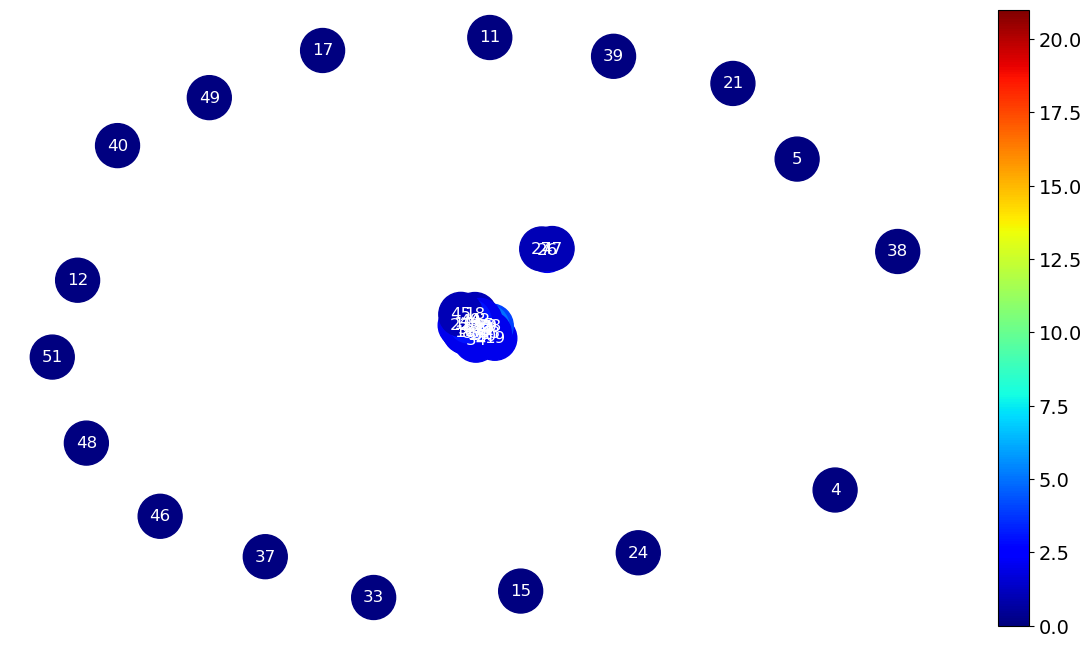

In [21]:
# the degree of network(g)
fig, ax = plt.subplots(1,1,figsize=(15,8))

# layout position
pos = nx.spring_layout(grafo2,seed=123456789,k=.6)
# color of nodes
color = list(dict(nx.degree(grafo2)).values())

# draw edges
nx.draw_networkx_edges(grafo2,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(grafo2,
                 pos=pos,
                 node_size=1000,
                 node_color=color,
                 cmap=plt.cm.jet,ax=ax)

# draw labels
nx.draw_networkx_labels(grafo2, pos=pos,
                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('degree.png', transparent=True,dpi=300)
plt.show()

/var/folders/0p/5510gchj13qdnm063wyk5hsc0000gn/T/ipykernel_63760/671453816.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('RdYlGn_r')


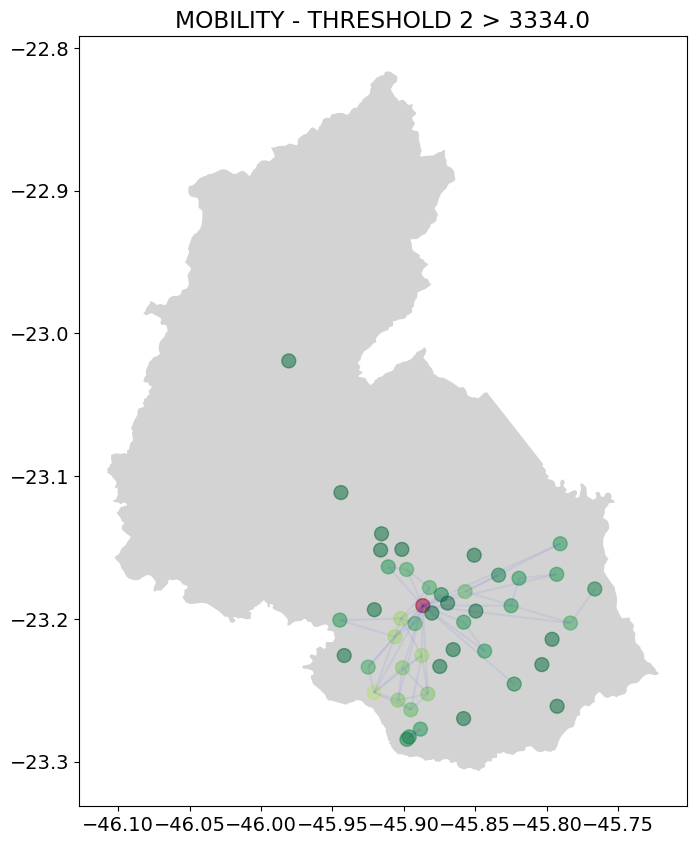

In [22]:
# Create geometry for points
geometry = [Point(xy) for xy in zip(zones['XCOORD'], zones['YCOORD'])]

# Create GeoDataFrame for nodes
gdf_zones = gpd.GeoDataFrame(zones, geometry=geometry, crs='EPSG:4326')

# Create a list of lines for the graph edges
lines = []
for edge in grafo2.edges():
    # print('Edges')
    start_node = edge[0]
    end_node = edge[1]

    # Check if nodes exist in the DataFrame
    if start_node in gdf_zones.index and end_node in gdf_zones.index:
        start_point = (gdf_zones.loc[start_node].geometry.x, gdf_zones.loc[start_node].geometry.y)
        end_point = (gdf_zones.loc[end_node].geometry.x, gdf_zones.loc[end_node].geometry.y)
        line = LineString([start_point, end_point])
        lines.append(line)
    else:
        print(f'One of the nodes in the edge does not exist: {start_node} or {end_node}')

# Create GeoDataFrame for lines
gdf_lines = gpd.GeoDataFrame(geometry=lines, crs='EPSG:4326')

# Compute the degree of each node
degree_dict = dict(grafo2.degree())

# Add the 'degree' column to gdf_zones
gdf_zones['degree'] = gdf_zones.index.map(degree_dict)

# Normalize the degrees to the range [0, 1]
max_degree = max(degree_dict.values())
min_degree = min(degree_dict.values())

gdf_zones['normalized_degree'] = gdf_zones['degree'].apply(lambda x: (x - min_degree) / (max_degree - min_degree))

# Define the colormap (green -> red)
colormap = cm.get_cmap('RdYlGn_r')

# Map the normalized values to colors
gdf_zones['color'] = gdf_zones['normalized_degree'].apply(lambda x: mcolors.to_hex(colormap(x)))

# Load the shapefile or GeoJSON file for São José dos Campos
sjc = gpd.read_file('data/map.geojson')

# Plot the map of SJC
ax = sjc.plot(figsize=(10, 10), color='lightgrey')

# Plot the points with colors based on the degree
gdf_zones.plot(ax=ax, color=gdf_zones['color'], alpha=0.5, markersize=100)

# Plot the edge lines
gdf_lines.plot(ax=ax, color='blue', alpha=0.05, aspect='equal')

# Add title
# plt.title(f'Mob - THRESHOLD 2 > {threshold2}')
plt.title(f'MOBILITY - THRESHOLD 2 > {round(threshold2, 3)}')

# Show the map
plt.show()


In [23]:
print(len(grafo2.edges()))

54


In [24]:
calcula_metricas(grafo2)

Não é conectado
<class 'list'>
{1: 21, 2: 3, 3: 1, 6: 3, 7: 6, 8: 3, 9: 4, 10: 2, 13: 6, 14: 6, 16: 2, 18: 1, 19: 2, 20: 2, 22: 2, 23: 1, 25: 5, 28: 4, 29: 5, 30: 5, 31: 7, 32: 3, 34: 2, 42: 2, 43: 2, 44: 3, 45: 1}
{1: 0.1, 2: 0.6666666666666666, 3: 0, 6: 1.0, 7: 0.4, 8: 0.6666666666666666, 9: 0.3333333333333333, 10: 1.0, 13: 0.5333333333333333, 14: 0.4666666666666667, 16: 1.0, 18: 0, 19: 0, 20: 0, 22: 1.0, 23: 0, 25: 0.7, 28: 0.6666666666666666, 29: 0.7, 30: 0.8, 31: 0.47619047619047616, 32: 1.0, 34: 1.0, 42: 1.0, 43: 0, 44: 0.3333333333333333, 45: 0}
{1: 0.8076923076923077, 2: 0.11538461538461539, 3: 0.038461538461538464, 6: 0.11538461538461539, 7: 0.23076923076923078, 8: 0.11538461538461539, 9: 0.15384615384615385, 10: 0.07692307692307693, 13: 0.23076923076923078, 14: 0.23076923076923078, 16: 0.07692307692307693, 18: 0.038461538461538464, 19: 0.07692307692307693, 20: 0.07692307692307693, 22: 0.07692307692307693, 23: 0.038461538461538464, 25: 0.19230769230769232, 28: 0.15384615384615

In [25]:
top_x_nodes_by_strength_and_centrality(grafo2)

Top 10 nodes by strength based on edge weights:
1 - 132498.00
13 - 59254.00
25 - 47553.00
7 - 38652.00
31 - 37217.00
14 - 33928.00
30 - 31110.00
9 - 26912.00
6 - 25096.00
28 - 23237.00

Top 10 nodes by closeness centrality (inverse of weight):
1 - 2765.5252
13 - 2053.0583
25 - 2003.0147
44 - 1923.2964
9 - 1919.1829
6 - 1918.5051
7 - 1848.7063
14 - 1789.2164
2 - 1746.8225
23 - 1710.8746

Top 10 nodes by betweenness centrality (inverse of weight):
1 - 0.2696
13 - 0.0261
9 - 0.0242
44 - 0.0242
43 - 0.0232
14 - 0.0213
7 - 0.0039
19 - 0.0010
25 - 0.0010
26 - 0.0010
31 - 0.0010

Top 10 nodes by degree centrality:
1 - 0.4565
31 - 0.1522
7 - 0.1304
13 - 0.1304
14 - 0.1304
25 - 0.1087
29 - 0.1087
30 - 0.1087
9 - 0.0870
28 - 0.0870

Top 10 nodes by eigenvector centrality:
1 - 0.5059
13 - 0.4465
25 - 0.3995
30 - 0.2508
31 - 0.2382
7 - 0.2268
6 - 0.1805
28 - 0.1789
14 - 0.1787
29 - 0.1637

Top 10 nodes by clustering coefficient:
6 - 0.3631
42 - 0.2532
25 - 0.2457
30 - 0.2364
16 - 0.2283
34 - 0.221

In [26]:
save_graph(grafo2, "grafo2_mob.pkl")

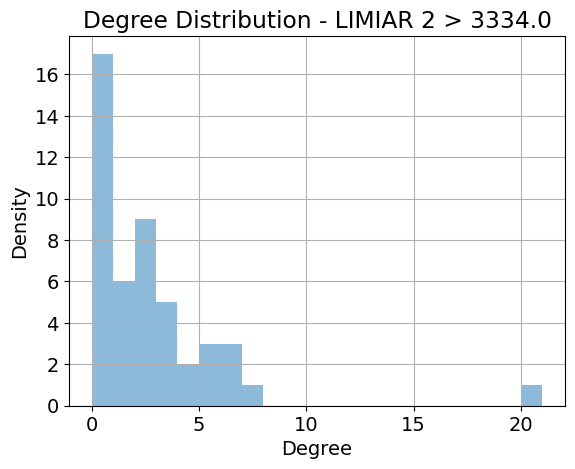

In [27]:
# Calculate the degree of each node
degrees = [degree for node, degree in grafo2.degree()]

# Plot the histogram of degree distribution
plt.hist(degrees, bins=range(0, max(degrees) + 1), alpha=0.5)
plt.title(f"Degree Distribution - LIMIAR 2 > {threshold2}")
plt.xlabel("Degree")
plt.ylabel("Density")
# Add grid
plt.grid(True)
plt.show()

### GRAFO 3

In [28]:
grafo = nx.Graph()
grafo.add_nodes_from(df.columns)

for i in range(len(df.columns)):
    for j in range(i + 1, len(df.columns)):
        weight = df.iloc[i, j]
        if weight > 0:
            grafo.add_edge(df.columns[i], df.columns[j], weight=weight)

In [29]:
def find_max_diameter_graph(original_graph):
    max_diameter = -1
    max_diameter_graph = None
    min_threshold = 10000000
    max_graph = None
    final_graph = None
    
    # Determine the list of thresholds based on edge weights, sorted from smallest to largest
    thresholds = sorted(set(weight for u, v, weight in original_graph.edges(data='weight')), reverse=True)
    print(thresholds)
    
    # Iterate over the thresholds
    for threshold in thresholds:
        # Create a copy of the original graph
        graph_copy = original_graph.copy()
        
        # Remove edges with weights below the threshold
        edges_to_remove = [(u, v) for u, v, weight in original_graph.edges(data='weight') if weight < threshold]
        graph_copy.remove_edges_from(edges_to_remove)
        
        # Find the largest connected component
        largest_connected_component = max(nx.connected_components(graph_copy), key=len)
        
        # Create a subgraph with only the largest connected component
        subgraph = graph_copy.subgraph(largest_connected_component)
        
        # Calculate the diameter of the subgraph
        diameter = nx.diameter(subgraph)
        
        # Check if the diameter is greater than the maximum found so far
        if diameter >= max_diameter:
            # print(threshold)
            max_diameter = diameter
            max_diameter_graph = subgraph
            min_threshold = threshold
            max_graph = graph_copy
                 
    return max_graph, max_diameter_graph, max_diameter, min_threshold

# Example usage:
# Suppose 'grafo' is your original graph
grafo3, max_diameter_graph, diameter, threshold = find_max_diameter_graph(grafo)
# nx.write_adjlist(grafo3,'grafo3_mob.adjlist')
save_adj_mtx_and_nodes(grafo3, 'output/grafo3_mob_mtx.txt', 'output/grafo3_mob_nodes.txt')


[22044.0, 9974.0, 9912.0, 9884.0, 9510.0, 9265.0, 9223.0, 9132.0, 9020.0, 8990.0, 8033.0, 7971.0, 7691.0, 7632.0, 7266.0, 7203.0, 6998.0, 6884.0, 6731.0, 5961.0, 5734.0, 5727.0, 5575.0, 5539.0, 5527.0, 5399.0, 5151.0, 4947.0, 4946.0, 4896.0, 4828.0, 4714.0, 4691.0, 4688.0, 4638.0, 4564.0, 4560.0, 4545.0, 4328.0, 4295.0, 4129.0, 4011.0, 3807.0, 3769.0, 3724.0, 3720.0, 3650.0, 3636.0, 3500.0, 3496.0, 3466.0, 3441.0, 3419.0, 3417.0, 3334.0, 3332.0, 3266.0, 3254.0, 3184.0, 3151.0, 3082.0, 3072.0, 2968.0, 2894.0, 2859.0, 2856.0, 2749.0, 2741.0, 2738.0, 2728.0, 2679.0, 2677.0, 2666.0, 2649.0, 2643.0, 2637.0, 2634.0, 2617.0, 2586.0, 2562.0, 2488.0, 2465.0, 2458.0, 2389.0, 2385.0, 2358.0, 2339.0, 2335.0, 2307.0, 2249.0, 2178.0, 2160.0, 2152.0, 2147.0, 2123.0, 2109.0, 2095.0, 2091.0, 2090.0, 2081.0, 2060.0, 2051.0, 2003.0, 1982.0, 1956.0, 1940.0, 1926.0, 1922.0, 1903.0, 1896.0, 1880.0, 1876.0, 1867.0, 1846.0, 1842.0, 1835.0, 1802.0, 1797.0, 1787.0, 1780.0, 1743.0, 1731.0, 1724.0, 1718.0, 1713.0

In [30]:
len(grafo3.edges)

14

In [31]:
print('Max Diameter: ', diameter)

Max Diameter:  6


In [32]:
print('Threshold: ', threshold)

Threshold:  7632.0


In [33]:
for u, v, weight in grafo3.edges(data='weight'):
    print(f"Edge ({u}, {v}) - weight: {weight}")

Edge (1, 2) - weight: 8033.0
Edge (1, 6) - weight: 9223.0
Edge (1, 9) - weight: 9510.0
Edge (1, 13) - weight: 9265.0
Edge (1, 23) - weight: 7632.0
Edge (1, 25) - weight: 9132.0
Edge (1, 44) - weight: 9884.0
Edge (6, 7) - weight: 9912.0
Edge (7, 14) - weight: 9020.0
Edge (9, 18) - weight: 9974.0
Edge (13, 25) - weight: 22044.0
Edge (13, 28) - weight: 7691.0
Edge (13, 30) - weight: 7971.0
Edge (30, 31) - weight: 8990.0


In [34]:
other_components = [comp for comp in nx.connected_components(grafo3) if len(comp) > 1 and comp != set(max_diameter_graph.nodes)]

if other_components:
    print("Other connected components with more than one node:")
    for comp in other_components:
        print(f"Component: {comp} - Number of nodes: {len(comp)}")
else:
    print("There are no other connected components with more than one node.")

There are no other connected components with more than one node.


Filtered edges: [(1, 2), (1, 6), (1, 9), (1, 13), (1, 25), (1, 44), (6, 7), (7, 14), (9, 18), (13, 25), (13, 28), (13, 30), (30, 31)]


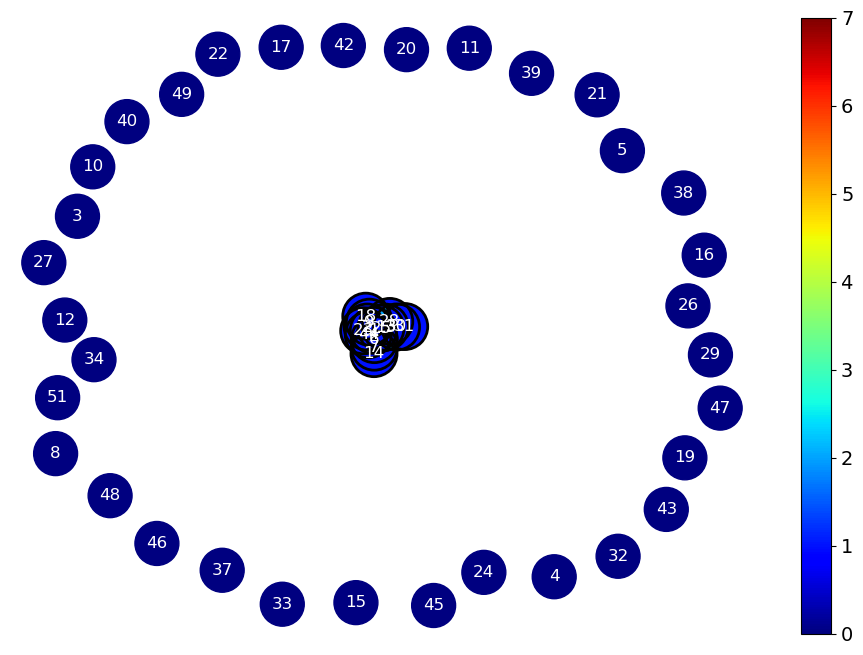

In [35]:
# Function to display the graph with a border around the nodes of the largest connected component
def show_graph_with_highlighted_nodes(graph, max_diameter_graph, threshold):
    # Figure setup
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))

    # Node positioning layout
    pos = nx.spring_layout(graph, seed=123456789, k=0.9)

    # Node color based on the degree of the graph
    color = [dict(nx.degree(graph)).get(node, 0) for node in graph.nodes()]

    # Filter edges with weight below the threshold
    edges_to_draw = [(u, v) for u, v, weight in graph.edges(data='weight') if weight > threshold]
    print(f'Filtered edges: {edges_to_draw}')

    # Draw the filtered edges
    nx.draw_networkx_edges(graph,
                           edgelist=edges_to_draw,
                           pos=pos,
                           alpha=0.4, ax=ax)

    # Draw all nodes
    nodes = nx.draw_networkx_nodes(graph,
                                   pos=pos,
                                   node_size=1000,
                                   node_color=color,
                                   cmap=plt.cm.jet, ax=ax)

    # Add a border to the nodes that are part of max_diameter_graph
    nx.draw_networkx_nodes(graph,
                           pos=pos,
                           nodelist=max_diameter_graph.nodes(),
                           node_size=1100,
                           edgecolors='black',
                           node_color='none',
                           linewidths=2, ax=ax)

    # Draw node labels
    nx.draw_networkx_labels(graph, pos=pos,
                            font_color='white', ax=ax)

    plt.axis("off")
    plt.colorbar(nodes)
    plt.show()

# Display the graph with a border around the nodes of the largest connected component
show_graph_with_highlighted_nodes(grafo3, max_diameter_graph, threshold=threshold)


/var/folders/0p/5510gchj13qdnm063wyk5hsc0000gn/T/ipykernel_63760/2198690123.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('RdYlGn_r')


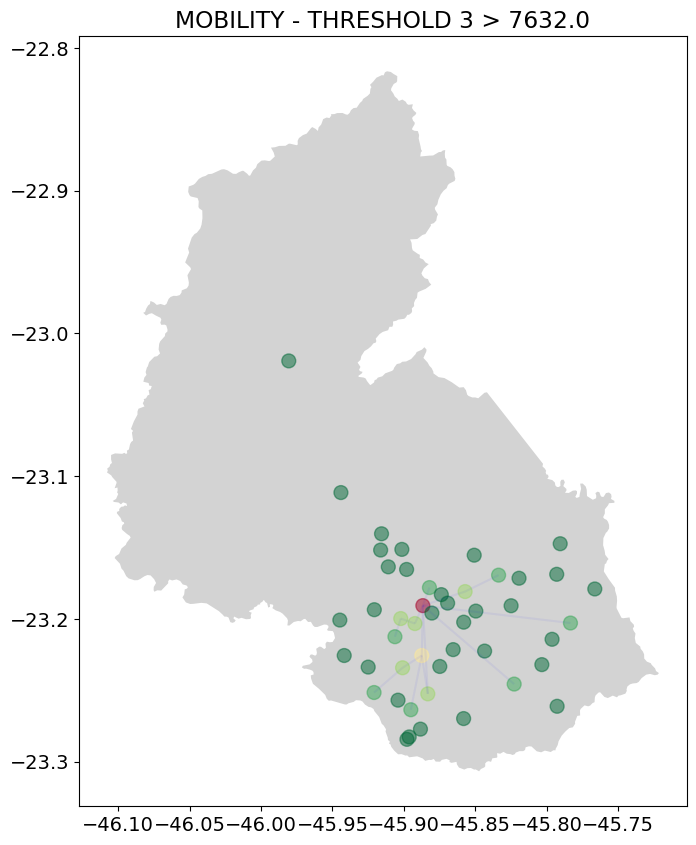

In [36]:
# Criar geometria dos pontos
geometry = [Point(xy) for xy in zip(zones['XCOORD'], zones['YCOORD'])]

# Criar GeoDataFrame dos nós
gdf_zones = gpd.GeoDataFrame(zones, geometry=geometry, crs='EPSG:4326')

# Criar lista de linhas para as arestas do grafo
lines = []
for edge in grafo3.edges():
    # print('Arestas')
    start_node = edge[0]
    end_node = edge[1]

    # Verificar se os nós existem no DataFrame
    if start_node in gdf_zones.index and end_node in gdf_zones.index:
        start_point = (gdf_zones.loc[start_node].geometry.x, gdf_zones.loc[start_node].geometry.y)
        end_point = (gdf_zones.loc[end_node].geometry.x, gdf_zones.loc[end_node].geometry.y)
        line = LineString([start_point, end_point])
        lines.append(line)
    else:
        print(f'Um dos nos na aresta nao existe: {start_node} ou {end_node}')

# Criar GeoDataFrame das linhas
gdf_lines = gpd.GeoDataFrame(geometry=lines, crs='EPSG:4326')

# Calcular o grau de cada nó
degree_dict = dict(grafo3.degree())

# Adicionar a coluna 'grau' ao gdf_zones
gdf_zones['grau'] = gdf_zones.index.map(degree_dict)

# Normalizar os graus para o intervalo [0, 1]
max_degree = max(degree_dict.values())
min_degree = min(degree_dict.values())

gdf_zones['grau_normalizado'] = gdf_zones['grau'].apply(lambda x: (x - min_degree) / (max_degree - min_degree))

# Definir o colormap (verde -> vermelho)
colormap = cm.get_cmap('RdYlGn_r')

# Mapear os valores normalizados para cores
gdf_zones['color'] = gdf_zones['grau_normalizado'].apply(lambda x: mcolors.to_hex(colormap(x)))

# Load the shapefile or GeoJSON file for São José dos Campos
sjc = gpd.read_file('data/map.geojson')

# Plot the map of SJC
ax = sjc.plot(figsize=(10, 10), color='lightgrey')

# Plot os pontos com cores baseadas no grau
gdf_zones.plot(ax=ax, color=gdf_zones['color'], alpha=0.5, markersize=100)

# Plot as linhas das arestas
gdf_lines.plot(ax=ax, color='blue', alpha=0.05, aspect='equal')

# Add title
# plt.title(f'Mob - LIMIAR 3 > {threshold}')
plt.title(f'MOBILITY - THRESHOLD 3 > {round(threshold, 3)}')

# Show the map
plt.show()

In [37]:
len(grafo3.nodes())

47

In [38]:
calcula_metricas(grafo3)

Não é conectado
<class 'list'>
{1: 7, 2: 1, 6: 2, 7: 2, 9: 2, 44: 1, 13: 4, 14: 1, 18: 1, 23: 1, 25: 2, 28: 1, 30: 2, 31: 1}
{1: 0.047619047619047616, 2: 0, 6: 0, 7: 0, 9: 0, 44: 0, 13: 0.16666666666666666, 14: 0, 18: 0, 23: 0, 25: 1.0, 28: 0, 30: 0, 31: 0}
{1: 0.5384615384615385, 2: 0.07692307692307693, 6: 0.15384615384615385, 7: 0.15384615384615385, 9: 0.15384615384615385, 44: 0.07692307692307693, 13: 0.3076923076923077, 14: 0.07692307692307693, 18: 0.07692307692307693, 23: 0.07692307692307693, 25: 0.15384615384615385, 28: 0.07692307692307693, 30: 0.15384615384615385, 31: 0.07692307692307693}
{1: 0.8205128205128205, 2: 0.0, 6: 0.28205128205128205, 7: 0.15384615384615385, 9: 0.15384615384615385, 44: 0.0, 13: 0.41025641025641024, 14: 0.0, 18: 0.0, 23: 0.0, 25: 0.0, 28: 0.0, 30: 0.15384615384615385, 31: 0.0}
{1: 7, 2: 1, 3: 0, 4: 0, 5: 0, 6: 2, 7: 2, 8: 0, 9: 2, 10: 0, 11: 0, 12: 0, 13: 4, 14: 1, 15: 0, 16: 0, 17: 0, 18: 1, 19: 0, 20: 0, 21: 0, 22: 0, 23: 1, 24: 0, 25: 2, 26: 0, 27: 0, 

In [39]:
# top_nodes_analysis(grafo3, 5)
top_x_nodes_by_strength_and_centrality(grafo3)

Top 10 nodes by strength based on edge weights:
1 - 62679.00
13 - 46971.00
25 - 31176.00
9 - 19484.00
6 - 19135.00
7 - 18932.00
30 - 16961.00
18 - 9974.00
44 - 9884.00
14 - 9020.00

Top 10 nodes by closeness centrality (inverse of weight):
1 - 1571.0078
13 - 1305.5398
25 - 1239.3721
6 - 1145.9608
9 - 1083.7196
44 - 1034.1319
2 - 958.6433
23 - 939.4040
30 - 902.9825
7 - 871.6602

Top 10 nodes by betweenness centrality (inverse of weight):
1 - 0.0618
13 - 0.0309
6 - 0.0213
7 - 0.0116
9 - 0.0116
30 - 0.0116
2 - 0.0000
3 - 0.0000
4 - 0.0000
5 - 0.0000
8 - 0.0000
10 - 0.0000
11 - 0.0000
12 - 0.0000
14 - 0.0000
15 - 0.0000
16 - 0.0000
17 - 0.0000
18 - 0.0000
19 - 0.0000
20 - 0.0000
21 - 0.0000
22 - 0.0000
23 - 0.0000
24 - 0.0000
25 - 0.0000
26 - 0.0000
27 - 0.0000
28 - 0.0000
29 - 0.0000
31 - 0.0000
32 - 0.0000
33 - 0.0000
34 - 0.0000
37 - 0.0000
38 - 0.0000
39 - 0.0000
40 - 0.0000
42 - 0.0000
43 - 0.0000
44 - 0.0000
45 - 0.0000
46 - 0.0000
47 - 0.0000
48 - 0.0000
49 - 0.0000
51 - 0.0000

To

In [40]:
save_graph(grafo3, "grafo3_mob.pkl")

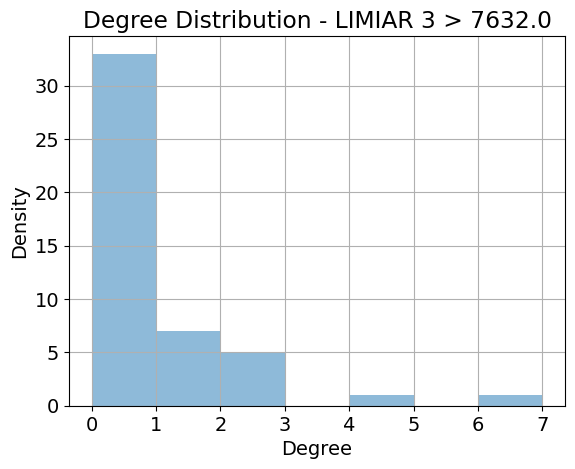

In [41]:
# Calculate the degree of each node
degrees = [degree for node, degree in grafo3.degree()]

# Plot the histogram of degree distribution
plt.hist(degrees, bins=range(0, max(degrees) + 1), alpha=0.5)
plt.title(f"Degree Distribution - LIMIAR 3 > {threshold}")
plt.xlabel("Degree")
plt.ylabel("Density")
# Add grid
plt.grid(True)
plt.show()

Calculating metrics

In [1]:
import pickle

def load_graph(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

# Substitua pelos caminhos corretos dos seus arquivos .pkl
graphs = {
    "Mob. S1": load_graph("grafo1_mob.pkl"),
    "Mob. S2": load_graph("grafo2_mob.pkl"),
    "Mob. S3": load_graph("grafo3_mob.pkl"),
    # "Dengue S2": load_graph("dengue_s2.pkl"),
    # "Dengue S3": load_graph("dengue_s3.pkl"),
}


In [2]:
import networkx as nx

def calculate_metrics(G):
    n_nodes = G.number_of_nodes()
    n_edges = G.number_of_edges()
    density = nx.density(G)
    avg_degree = sum(dict(G.degree()).values()) / n_nodes

    # Diâmetro da maior componente conexa
    if nx.is_connected(G):
        diameter = nx.diameter(G)
    else:
        largest_cc = max(nx.connected_components(G), key=len)
        subgraph = G.subgraph(largest_cc)
        diameter = nx.diameter(subgraph)

    clustering = nx.average_clustering(G)
    n_components = nx.number_connected_components(G)

    return {
        "Edges": n_edges,
        "Density": round(density, 4),
        "Avg. Degree": round(avg_degree, 2),
        "Diameter": diameter,
        "Clustering": round(clustering, 4),
        "Components": n_components,
    }


In [3]:
import pandas as pd

results = {}
for name, G in graphs.items():
    results[name] = calculate_metrics(G)

df_metrics = pd.DataFrame(results).T
print(df_metrics)


         Edges  Density  Avg. Degree  Diameter  Clustering  Components
Mob. S1  817.0   0.7558        34.77       2.0      0.8543         1.0
Mob. S2   54.0   0.0500         2.30       4.0      0.2945        19.0
Mob. S3   14.0   0.0130         0.60       6.0      0.0258        34.0


In [4]:
latex_table = df_metrics.to_latex(
    index=True,
    column_format='lcccccc',
    caption="Summary of network metrics for mobility and dengue case networks constructed under different thresholding criteria.",
    label="tab:threshold_summary"
)
print(latex_table)


\begin{table}
\caption{Summary of network metrics for mobility and dengue case networks constructed under different thresholding criteria.}
\label{tab:threshold_summary}
\begin{tabular}{lcccccc}
\toprule
 & Edges & Density & Avg. Degree & Diameter & Clustering & Components \\
\midrule
Mob. S1 & 817.000000 & 0.755800 & 34.770000 & 2.000000 & 0.854300 & 1.000000 \\
Mob. S2 & 54.000000 & 0.050000 & 2.300000 & 4.000000 & 0.294500 & 19.000000 \\
Mob. S3 & 14.000000 & 0.013000 & 0.600000 & 6.000000 & 0.025800 & 34.000000 \\
\bottomrule
\end{tabular}
\end{table}

